### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# importing z- score for scaling
from scipy.stats import zscore

from sklearn import metrics

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [3]:
# Reading dataset


vehicle = pd.read_csv("C:/Users/Tanu/Desktop/Greatleaning/24th Nov/External_Lab/vehicle.csv")
vehicle.shape

# dataset consists of 846 records

(846, 19)

In [4]:
#Dropping missing values using below steps

# Finding columns having missing values & counts of the missing values
print (vehicle.isnull().sum())

# Removing records having missing values
vehicle1= vehicle.dropna(how='any')

print(vehicle1.shape)

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64
(813, 19)


In [ ]:
# After removing the rows which were containing missing values; dataset consists of 813 records 

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [5]:
# Printing count of 'Class' variable
vehicle1['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

Text(0,0.5,'Frequency')

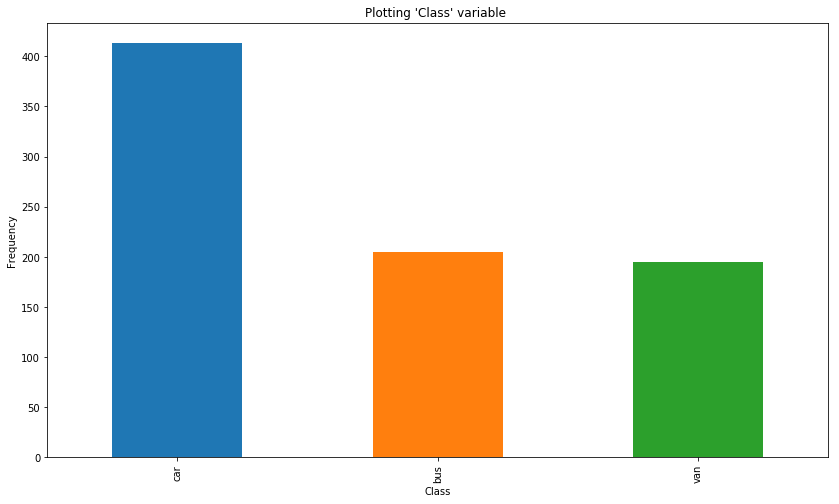

In [6]:
# Plotting 'Class' variable
ax = vehicle1['class'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Plotting 'Class' variable ")
ax.set_xlabel("Class")
ax.set_ylabel("Frequency")

### Check for any missing values in the data 

In [7]:
# Checking any missing value in the data

vehicle1.isnull().values.any()

# No missing value now

False

### 3. Standardize the data 

In [8]:
#Dropping 'Class' variable as its categorical variable

X1 = vehicle1.drop({'class'}, axis=1)

#Scaling numeric attributes in models that calculate distances.

X2 = X1.apply(zscore)  # convert all attributes to Z scale 
X2.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [9]:
#outliers treatment- 

# This data is standardized so any value which is less than -3 or greater than 3 is outlier here.(mu+- 3 sigma)
#  so for treatment of outliers, we'll remove those records which are outliers

# Deleting Outlier

X3 = X2[~((X2 >3).any(axis=1) | (X2 < -3 ).any(axis=1))]
X3.shape

# outliers removed

(792, 18)

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion  & 5. Calculating distortion- C Distance

In [11]:
#Assign a dummy array called distortion

cluster_range = range( 2, 10)   # Keeping range for number of clusters as 2 to 10 
distortion = []
cluster_sil_scores = []

# Calculating distortion
for num_clusters in cluster_range:
   clusters = KMeans( num_clusters, n_init = 10)
   clusters.fit(X3)
   labels = clusters.labels_                     # capture the cluster lables
   centroids = clusters.cluster_centers_         # capture the centroids
   distortion.append( clusters.inertia_ )    # capture the intertia
   cluster_sil_scores.append(metrics.silhouette_score(X3, labels, metric='euclidean'))


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "distortion": distortion , "Avg Sil Score": cluster_sil_scores } )

clusters_df

,num_clusters,distortion,Avg Sil Score
0,2,6877.772285,0.398566
1,3,5328.459021,0.304400
2,4,4794.185614,0.247082
3,5,4336.891868,0.228055
4,6,4055.421071,0.206716
5,7,3809.581324,0.193546
6,8,3615.031902,0.184602
7,9,3419.325555,0.190707


#You can later use this array to plot the elbow plot

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

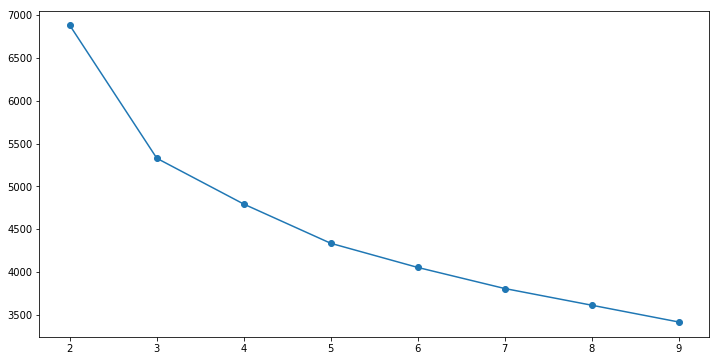

In [13]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.distortion, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [ ]:
# Optimal value seems to be 4 from the above elbow plot

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [14]:
cluster1 = KMeans( n_clusters = 4, random_state = 1 )
cluster1.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [16]:
# Get the centroids.... using function cluster_centers_

centroids1 = cluster1.cluster_centers_
centroids1

array([[ 1.19536241e+00,  1.27284347e+00,  1.27195096e+00,
         9.75115740e-01,  7.68300353e-02,  2.59299726e-01,
         1.36425757e+00, -1.25900153e+00,  1.37772436e+00,
         1.19866527e+00,  1.24327034e+00,  1.37573313e+00,
         1.18020010e+00, -7.63258927e-02,  1.69270523e-01,
         2.70045219e-01, -8.12740871e-02,  1.64358336e-01],
       [-7.20203770e-01, -1.99168816e-02, -3.33658054e-01,
        -5.75671855e-01, -2.07049075e-02,  1.59901855e-02,
        -4.79958561e-01,  3.87014388e-01, -4.90182340e-01,
         8.13455735e-02, -4.63886563e-01, -5.33605180e-01,
         1.43648074e-02,  2.71137834e-01, -2.40232434e-01,
        -4.33211865e-01, -6.26259487e-01, -4.30511150e-01],
       [ 1.98190187e-01, -1.34097733e-01,  1.84859389e-01,
         5.68548516e-01,  3.80682134e-01, -1.29616349e-01,
         1.18240783e-01, -3.55161085e-01,  4.38665664e-02,
        -1.98545452e-01,  1.71277051e-01,  7.32450828e-02,
        -1.84588743e-01, -5.87046360e-01, -5.01875653e

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [62]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid1_df = pd.DataFrame(centroids1, columns = list(X3) )

centroid1_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.195362,1.272843,1.271951,0.975116,0.076830,0.259300,1.364258,-1.259002,1.377724,1.198665,1.243270,1.375733,1.180200,-0.076326,0.169271,0.270045,-0.081274,0.164358
1,-0.720204,-0.019917,-0.333658,-0.575672,-0.020705,0.015990,-0.479959,0.387014,-0.490182,0.081346,-0.463887,-0.533605,0.014365,0.271138,-0.240232,-0.433212,-0.626259,-0.430511
2,0.198190,-0.134098,0.184859,0.568549,0.380682,-0.129616,0.118241,-0.355161,0.043867,-0.198545,0.171277,0.073245,-0.184589,-0.587046,-0.000502,0.124077,0.858744,0.672042
3,-0.976600,-0.843661,-1.170565,-1.313069,-0.819096,-0.510285,-0.949670,1.130715,-0.895650,-0.859852,-0.990586,-0.921488,-0.650241,1.001554,0.042053,-0.196117,-1.208844,-1.394156
4,-0.395110,-0.987962,-0.654443,-0.372201,-0.006856,-0.262796,-0.829461,0.790518,-0.826279,-0.895620,-0.805123,-0.785632,-1.047050,-0.855631,-0.155409,0.028749,1.121163,0.919916


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [28]:
labels1 = cluster1.labels_ 

#copy dataframe (may be memory intensive but just for illustration)
df_processed = X3.copy()
df_processed['Cluster_Labels'] = pd.Series(labels1, index=df_processed.index)

df_processed


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,Cluster_Labels
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,2
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,1
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,0
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,4
6,0.406283,-0.293543,-0.573312,0.116137,0.404751,-0.556023,-0.470734,0.129648,-0.606014,-0.337462,-0.397397,-0.441776,-0.069700,-0.856567,1.351690,-1.310052,1.792048,1.118521,2
7,-0.444400,-0.293543,-1.017098,-0.360128,0.404751,0.085785,-0.954676,0.899019,-0.994877,-0.130505,-0.846883,-0.898494,-0.317284,-0.722724,-0.681472,-1.085874,0.653818,0.848040,4
8,-0.930504,-1.758654,-1.270690,-0.866160,-0.097251,-0.342087,-1.408372,1.668390,-1.383740,-1.441236,-1.521112,-1.229615,-1.926579,-1.124255,-0.884788,0.147109,1.792048,1.659484,4
10,-0.930504,-1.433074,-0.763506,-0.776860,-0.097251,0.085785,-1.075662,1.155476,-0.994877,-1.234278,-1.135838,-0.984129,-1.462359,-0.856567,-0.884788,-0.301249,0.816422,0.848040,4
11,-0.444400,-1.758654,-1.017098,-0.985226,-0.850254,-0.556023,-1.378125,1.668390,-1.383740,-2.062109,-1.296369,-1.223906,-1.740891,-0.990411,-0.274839,1.492180,1.141631,0.848040,4
12,-0.687452,0.194828,-0.509914,0.056604,0.781252,-0.556023,-0.500981,0.257876,-0.606014,0.007467,-0.268973,-0.510283,0.549260,-0.187348,-0.274839,-0.189159,0.003400,-0.098644,1
